# Notebook de nettoyage des données de Olist

Nous allons commencer notre analyse exploratoire des données pour mieux s'approprier les données de notre client (Olist).

Dans un premier temps, nous allons importer les librairies nécessaires à l'exploration des données.

In [369]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Dans un second temps, nous allons charger nos données dans divers variables pour voir leurs contenues.

In [370]:
customers = pd.read_csv("data/notclean/olist_customers_dataset.csv")
geolocation = pd.read_csv("data/notclean/olist_geolocation_dataset.csv")
order_items = pd.read_csv("data/notclean/olist_order_items_dataset.csv")
order_payments = pd.read_csv("data/notclean/olist_order_payments_dataset.csv")
order_reviews = pd.read_csv("data/notclean/olist_order_reviews_dataset.csv")
orders = pd.read_csv("data/notclean/olist_orders_dataset.csv")
products = pd.read_csv("data/notclean/olist_products_dataset.csv")
sellers = pd.read_csv("data/notclean/olist_sellers_dataset.csv")
product_category_name = pd.read_csv("data/notclean/product_category_name_translation.csv")

Maintenant que nos données sont bien chargées en mémoire, nous allons afficher les champs des different dataset.

Commençons par celui des clients,

## Customers

In [371]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Nous remarquons dès lors, la présence de plusieurs champs qui définissent ce qu'est un client.

À savoir :

- customer_id qui reflète l'id d'un client
- customer_unique_id qui reflète l'id unique d'un client
- customer_zip_code_prefix qui reflète le code postal d'un client
- customer_city qui reflète la ville du client en adéquation avec son code postale
- customer_state qui reflète l'état ou région de la ville du client

Désormais nous connaissons les champs qui définissent ce qu'est un client.

Faisons le même exercice pour les datasets

## Geolocation

In [372]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Les champs que nous retrouvons :

- geolocation_zip_code_prefix : Qui reflète le code postal lié à l'entrée de géolocalisation.
- geolocation_lat : Qui reflète la latitude de la géolocalisation
- geolocation_lat : Qui reflète la longitude de la géolocalisation
- geolocation_city : Qui reflète la ville liée à la géolocalisation
- geolocation_state : Qui reflète l'état lié à la ville

## Les factures (produit)

In [373]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Nous remarquons ici divers champs :

- order_id : Qui correspond à l'id de la facture
- order_item_id : Qui correspond à l'id de la facture du produit
- product_id : Qui correspond l'id du produit
- seller_id : Qui correspond à l'id du vendeur
- shipping_limit_date : Qui correspond à la date maximale avant expiration de la facture
- price : Qui correspond au prix de la facture
- freight_value : Qui correspond au frais d'expédition

Nous pouvons dès lors émettre l'hypothèse que nous pourrons générer un dataset unique en regroupant les données des different dataset notamment grâce aux id communs.

## Les notes de paiements

In [374]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Nous retrouvons ici la liste des paiements correspondant à une facture

- order_id : Qui correspond à l'id de la facture
- payment_sequential : Qui correspond à la séquence des paiements
- payment_type : Qui correspond au moyen de paiement utilisé
- payment_installments : Qui correspond au paiement en plusieurs fois (mois)
- payment_value : Qui correspond au montant payé.

## Les reviews de facture

In [375]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Ici nous retrouvons :

- review_id : Qui reflète l'id de l'avis client
- order_id : Qui reflète l'id de la facture du client
- review_score : Qui nous donne un score renseigné par le client sur cinq
- review_comment_title : Qui nous donne le titre de l'avis client
- review_comment_message : Qui nous donne le contenu de l'avis du client
- review_creation_date : Qui nous donne la date de création de l'avis du client
- review_answer_timestamp : Qui nous donne la date de réponse à l'avis du client

## Les factures

In [376]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Nous retrouvons :

- order_id qui reflète l'id de la facture
- customer_id qui reflète l'id du client
- order_status qui reflète le statut de la facture
- order_purchase_timestamp qui reflète la date d'achat
- order_approved_at qui reflète la date d'acceptation de la facture
- order_delivered_carrier_date qui reflète de livraison indiquée par le transporteur
- order_delivered_customer_date qui reflète la date de livraison au client
- order_estimated_delivery_date qui reflète la date de livraison estimée

In [377]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Nous retrouvons ici :

- product_id qui reflète l'id du produit
- product_category_name qui donne la catégorie du produit
- product_name_lenght qui donne le nombre de caractères du nom du produit
- product_description_lenght qui donne le nombre de caractères de la description du produit
- product_photos_qty qui donne la quantité de photo pour le produit
- product_weight_g qui donne le poids en gramme du produit
- product_lenght_cm qui donne la longueur en centimetre du produit
- product_height_cm qui donne la hauteur en centimetre du produit
- product_width_cm qui donne la largeur en centimetre du produit

In [378]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Pour les vendeurs :

- seller_id qui reflète l'id du vendeur
- seller_zip_code_prefix qui donne le code postal du vendeur
- seller_city qui donne la ville du vendeur
- seller_state qui donne l'état ou la région du vendeur

In [379]:
product_category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Pour les catégories de produit :

- product_category_name qui reflète le nom de la catégorie du produit en brésilien
- product_category_name_english qui donne la catégorie du produit en anglais

## Conclusion

Nous avons désormais les connaissances des different champs, nous pouvons émettre dès lors des conclusions.

- Certaine clé comme le customer_id sont disponibles dans d'autre table pour émettre des relations entre les objets, nous pouvons ainsi créer un dataset plus complet en réalisation des jointures sur les produits et les catégories.
- Nous pouvons voir des variables qui ne seront pas pertinente à notre RFM, nous pouvons ainsi les supprimer.

Nous allons pouvoir démarrer le travail autour de nos conclusions.

In [380]:
products = pd.merge(products, product_category_name,  how="left", on="product_category_name")

features = ["product_category_name", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]

products.drop(features, axis=1, inplace=True)
products = products.rename(columns={"product_category_name_english": "product_category_name"})

products.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,housewares


Nous avons pu réaliser notre jointure sur les produits et les catégories.

Essayons désormais de visualiser la **répartition des catégories de produits** :

Text(0.5, 1.0, 'Les catégories produits les plus représentée')

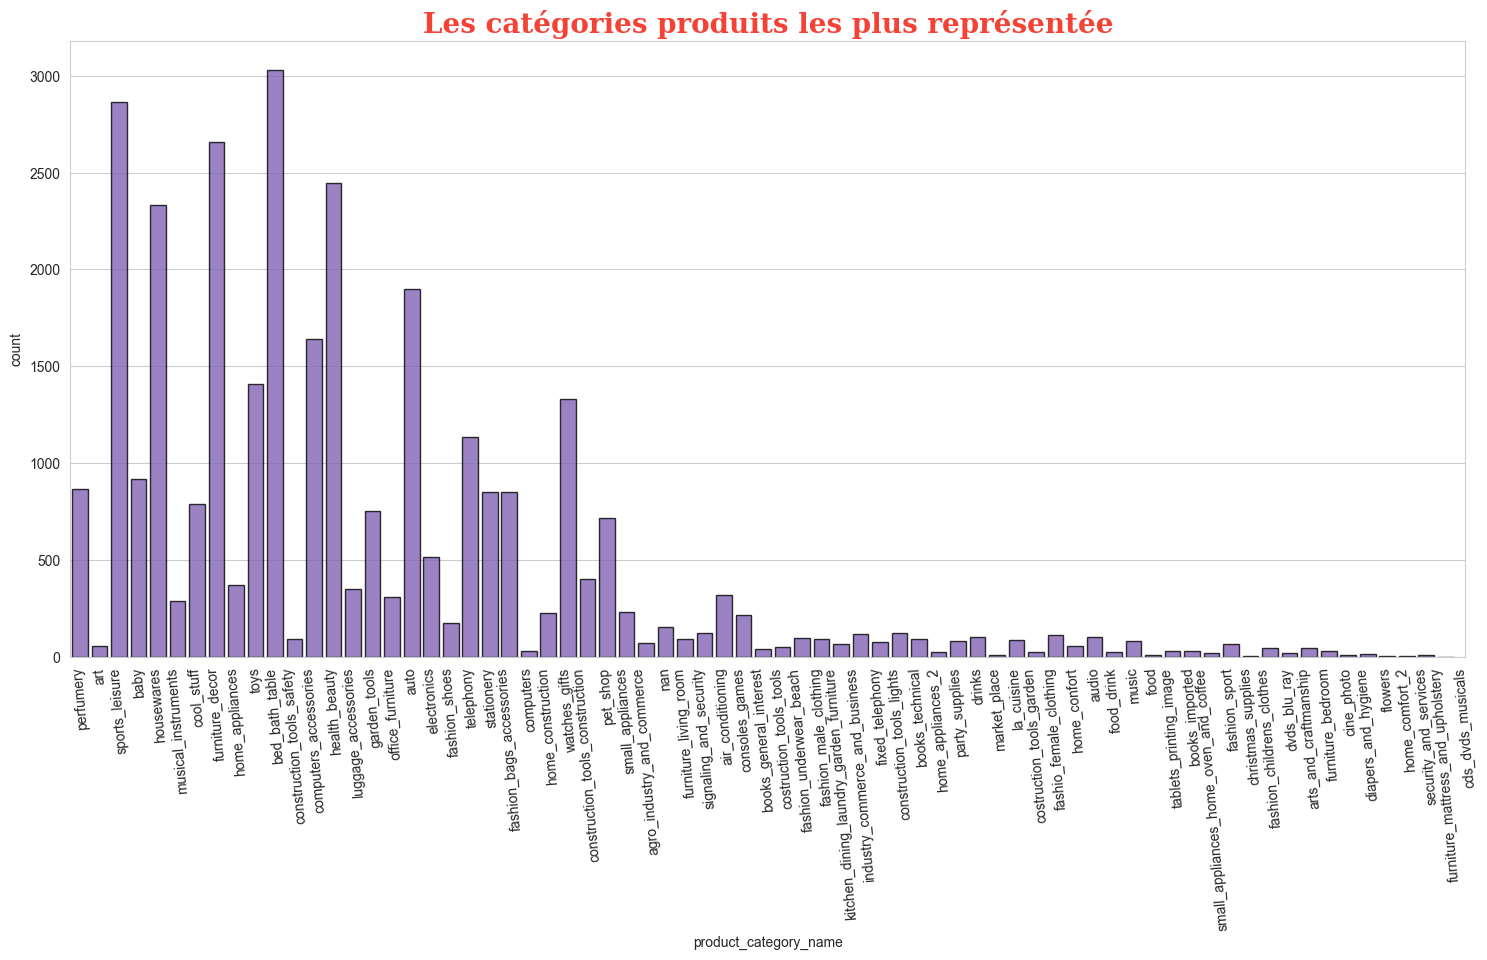

In [381]:
sns.set_style("whitegrid")
font_title = {
    "family": "serif",
    "color": "#f44336",
    "weight": "bold",
    "size": "20"
}

plt.figure(figsize=(18, 8))
sns.countplot(data=products, x="product_category_name", edgecolor="black", color="#7E57C2", alpha=0.8)

number_range = range(0, products["product_category_name"].nunique() + 1)
plt.xticks(number_range, products["product_category_name"].unique(), rotation=95)

plt.title("Les catégories produits les plus représentée", fontdict=font_title)

Les catégories les plus représentées sont les suivantes :

- bed_bath_table
- sports_leisure
- furniture_decor

Regroupons maintenant les données des commandes et les données de clients.

In [382]:
order_items = pd.merge(order_items, orders, how="left", on="order_id")

features = ["seller_id", "shipping_limit_date", "order_approved_at", "order_delivered_carrier_date", "order_estimated_delivery_date"]

order_items.drop(features, axis=1, inplace=True)

order_items.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31


Nous allons maintenant nous intéresser aux status de nos commandes afin de ne conserver que les commandes qui sont complètement terminées.

In [383]:
order_items.groupby(by="order_status").sum()["order_item_id"]

C:\Users\Laïl Desfossez\AppData\Local\Temp\ipykernel_10360\3658753907.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_items.groupby(by="order_status").sum()["order_item_id"]


order_status
approved            4
canceled          704
delivered      132036
invoiced          435
processing        455
shipped          1294
unavailable         8
Name: order_item_id, dtype: int64

Nous voyons qu'il y a beaucoup de commandes qui ne sont pas "delivered", nous allons donc les écarter pour ne garder que celle en delivered.

In [384]:
order_items = order_items[order_items["order_status"] == "delivered"]

Visualisons maintenant l'évolution du nombre de commandes passées par jour

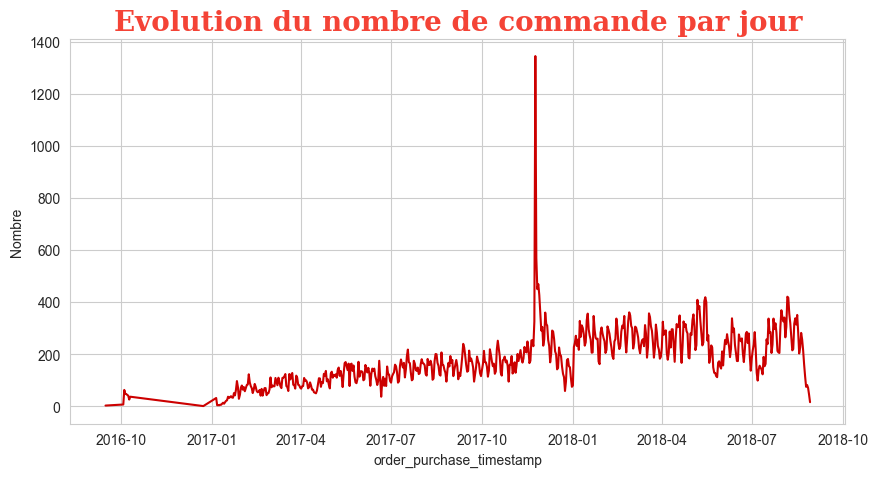

In [385]:
order_day = order_items.groupby(order_items["order_purchase_timestamp"].astype('datetime64[ns]').dt.date).count()["order_id"]
plt.figure(figsize=(10, 5))
ax = order_day.plot(color="#cc0000")
ax.set_ylabel("Nombre" )
plt.title("Evolution du nombre de commande par jour", fontdict=font_title)
plt.show()

Nous remarquons un pic étrange en décembre 2017, nous pourrions émettre en première hypothèse que ce pic correspond à la fête de fin d'année.

Essayons de convertir nos données de date en datetime Python pour poursuivre notre analyse exploratoire.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   price                          110197 non-null  float64       
 4   freight_value                  110197 non-null  float64       
 5   customer_id                    110197 non-null  object        
 6   order_status                   110197 non-null  object        
 7   order_purchase_timestamp       110197 non-null  datetime64[ns]
 8   order_delivered_customer_date  110189 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 8.4+ MB


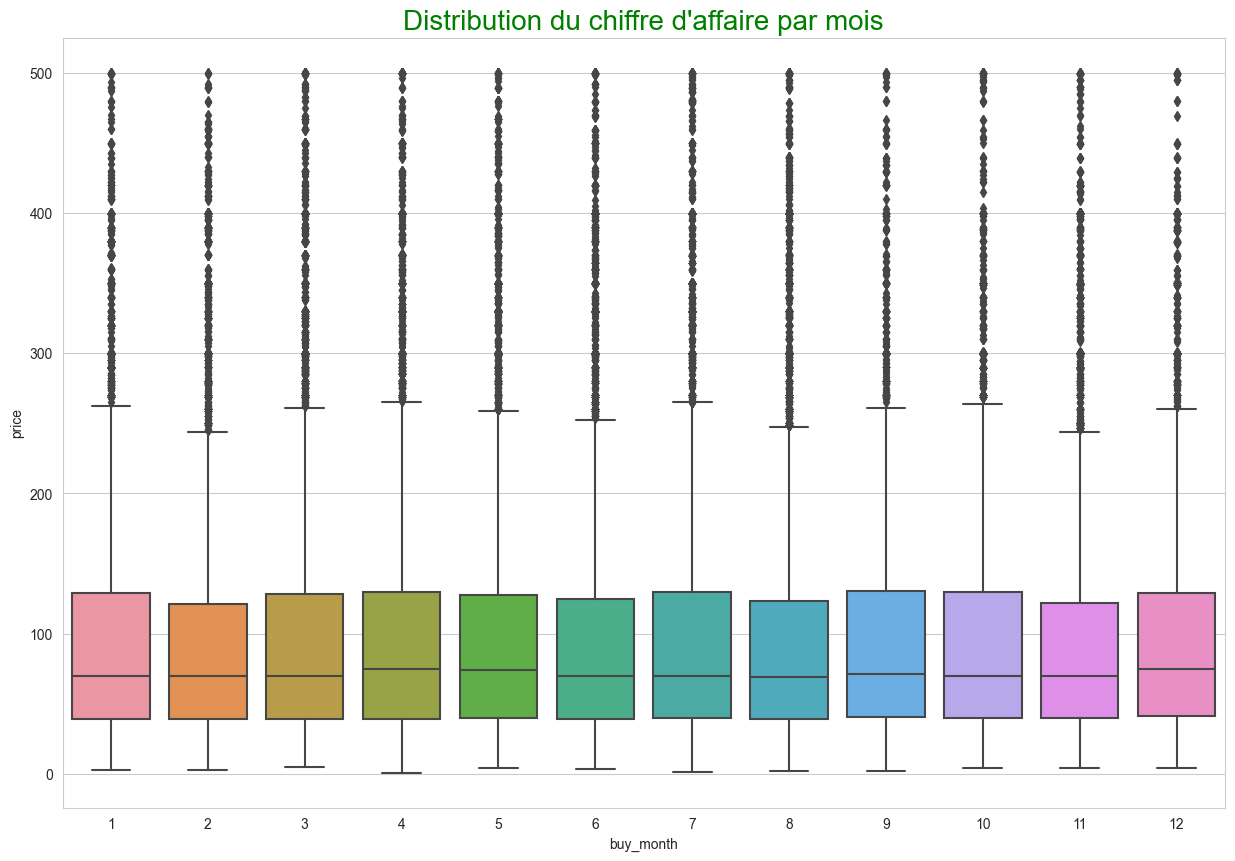

In [386]:
order_items["order_purchase_timestamp"] = order_items["order_purchase_timestamp"].astype('datetime64[ns]')
order_items["order_delivered_customer_date"] = order_items["order_delivered_customer_date"].astype('datetime64[ns]')
order_items.info()

order_items["buy_month"] = order_items['order_purchase_timestamp'].dt.month

price_lower_than_500 = order_items[order_items.price < 500]

fig = plt.figure(figsize=(15,10))
sns.boxplot(data=price_lower_than_500, x="buy_month", y="price")

plt.title("Distribution du chiffre d'affaire par mois", fontsize=20, color="g")
plt.show()

La médiane et la variance sont relativement équivalente à travers les different mois de l'année.

Concernant les avis clients, il serait intéressant de créer une variable pour savoir si les commandes sont notées ou non et de la lier à une autre variable pour connaître la note attribuée.

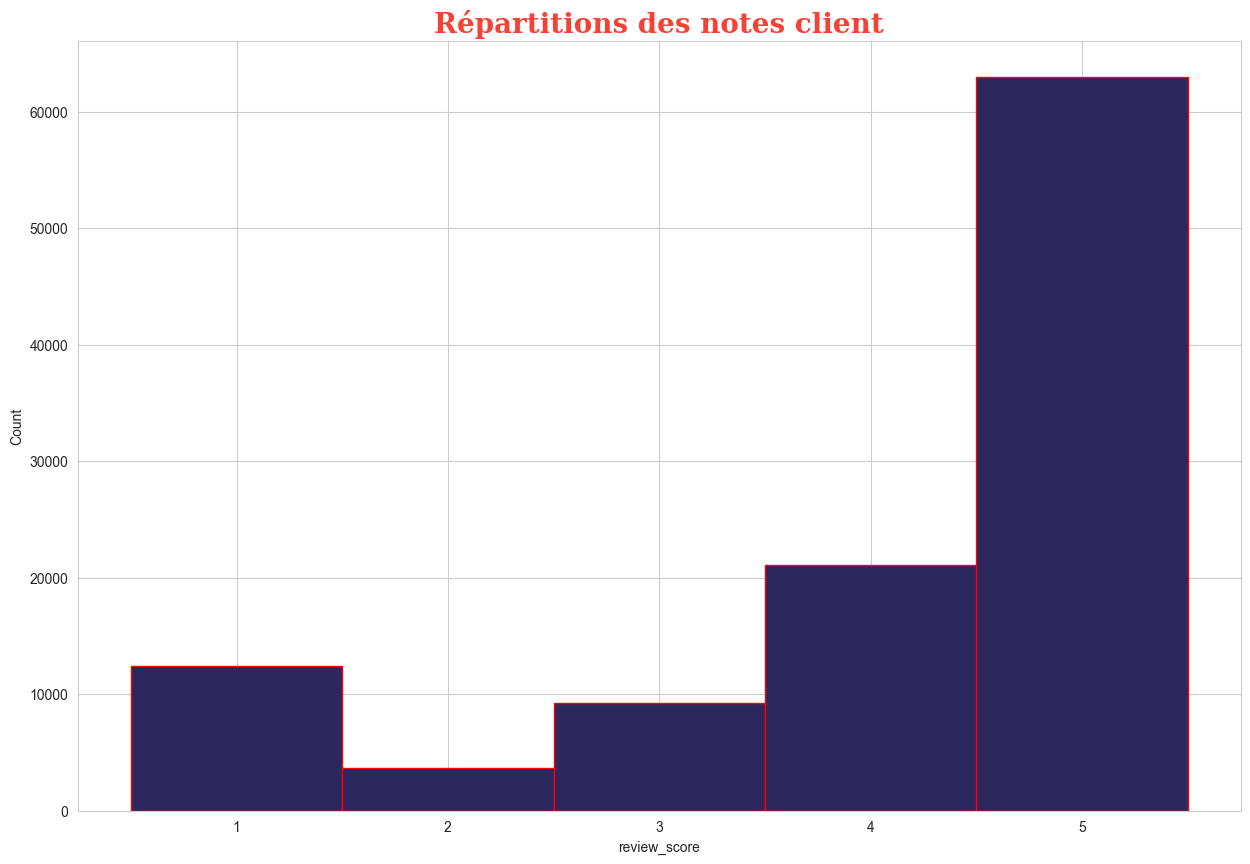

In [387]:
reviews_group = order_reviews.groupby("order_id").agg({"review_id": "count","review_score": "mean"})
order_items = pd.merge(order_items, reviews_group, how="left", on="order_id")
order_items = order_items.rename(columns={"review_id": "is_reviewed"})
order_items.head()

order_items["is_reviewed"] = np.where(order_items["is_reviewed"] == 1, True, False)

plt.figure(figsize=(15, 10))
sns.histplot(data=order_items, x="review_score",
             discrete=True,
             edgecolor="red",
             color="#2c275c", alpha=1)

plt.title("Répartitions des notes client",fontdict=font_title)
plt.show()


Nous pouvons observer un haut pourcentage de note positive, ce qui est plutôt rassurant.

Si nous décidons de nous intéresser au moyen de paiement, nous voyons que les données ne sont pas forcément claire notamment sur le nombre total de moyen de paiement qui peuvent être utilisé ou encore le nombre total d'échéance par commande.

Essayons de créer une solution.

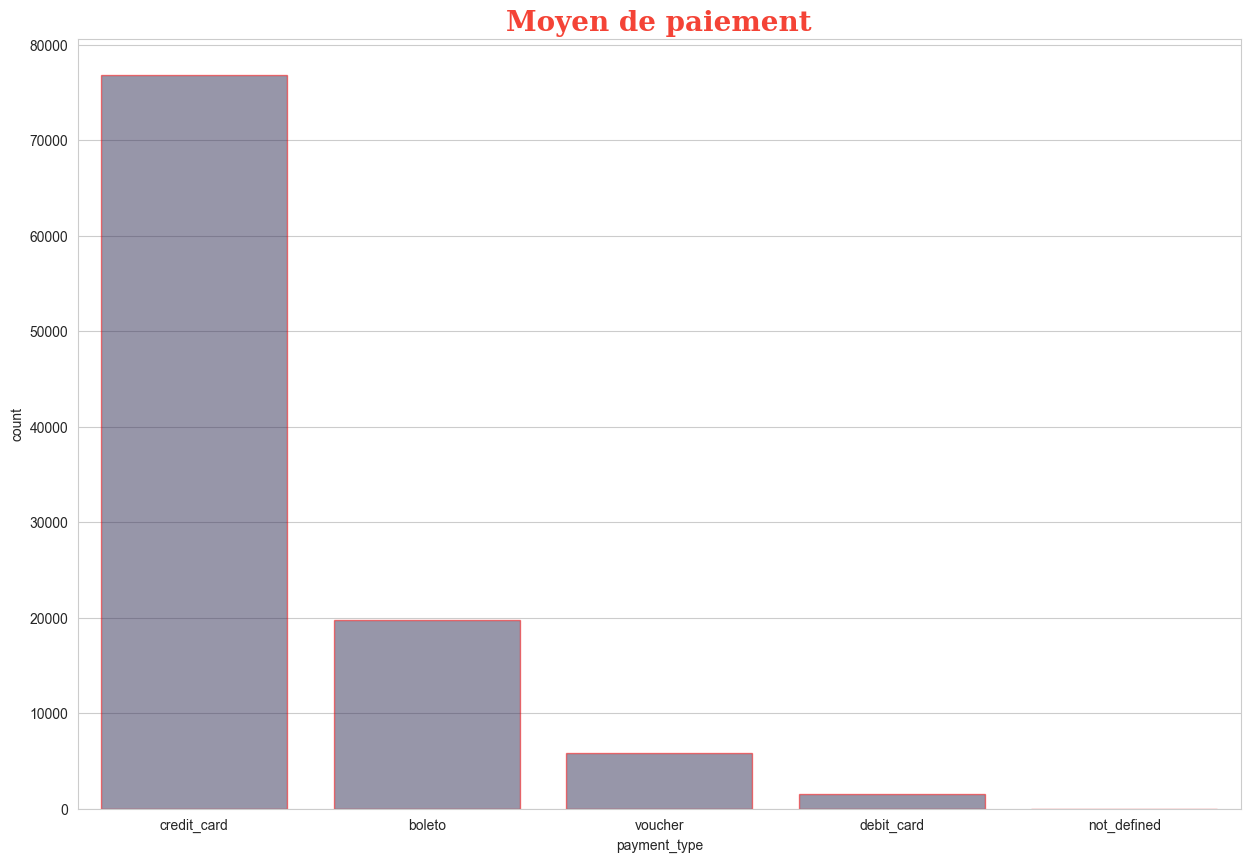

In [388]:
payment_group = order_payments.groupby(by="order_id").agg({"payment_installments": 'sum',"payment_sequential": 'count'})
order_items = pd.merge(order_items, payment_group, how="left", on="order_id")
order_items = order_items.rename(columns={"payment_installments": "sum_payment_installments","payment_sequential": "nb_payment_sequential"})

plt.figure(figsize=(15, 10))
sns.countplot(data=order_payments, x="payment_type",
              edgecolor="red",
              color="#2c275c", alpha=0.5)

plt.title("Moyen de paiement", fontdict=font_title)
plt.show()

Nous pouvons maintenant remarquer que 75% des commandes sont réalisé par carte bancaire.

Désormais, nous pouvons créer un dataset global.

In [389]:
order_items = pd.merge(order_items, customers,
                       how="left",
                       on="customer_id")

data = pd.merge(order_items, products,
               how="left",
               on="product_id")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   price                          110197 non-null  float64       
 4   freight_value                  110197 non-null  float64       
 5   customer_id                    110197 non-null  object        
 6   order_status                   110197 non-null  object        
 7   order_purchase_timestamp       110197 non-null  datetime64[ns]
 8   order_delivered_customer_date  110189 non-null  datetime64[ns]
 9   buy_month                      110197 non-null  int64         
 10  is_reviewed                    110197 non-null  bool          
 11  